In [138]:
# Minhaz
# Assignment - Model Selection
# Data set - Titanic
# Submission date - 26-05-2024

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
# Data set
data = pd.read_csv(r"C:\Users\mamin\Downloads\titanic_dataset .csv",index_col="PassengerId")

In [141]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
data1 = data.copy()

In [143]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [145]:
data1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [146]:
# Handling missing values & outliers

In [147]:
data1.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


In [148]:
data1.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [149]:
data1.shape

(891, 11)

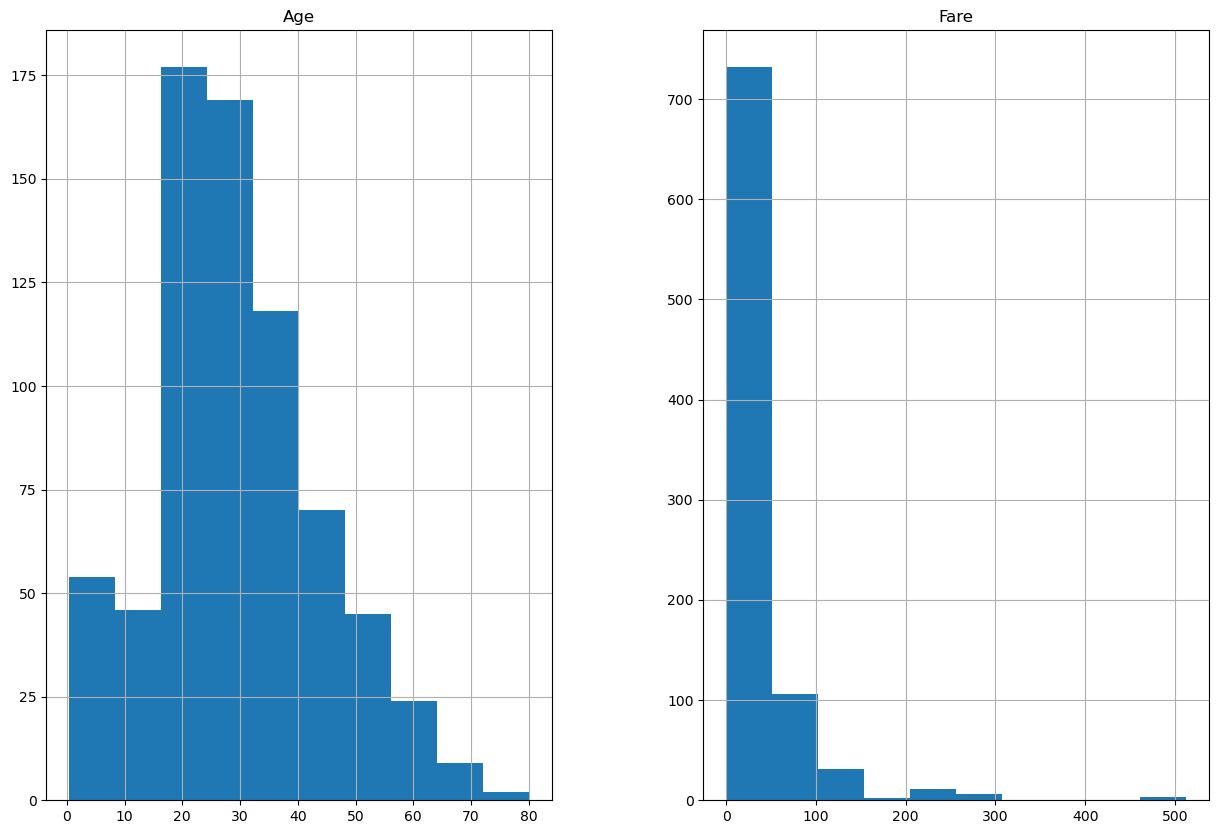

In [150]:
freqgraph = data1.select_dtypes(include='float64')
freqgraph.hist(figsize=(15,10));

In [151]:
# Applying SimpleImputer() in Age column, missing values are replacing with Median
from sklearn.impute import SimpleImputer 
num_col = ['Age']
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
data1[num_col]=imputer.fit_transform(data1[num_col])

In [152]:
# Using mode() to fill missing values in column "Embarked"
data1['Embarked'].fillna(data1['Embarked'].mode()[0], inplace=True)

In [153]:
data1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [154]:
# Dropping columns which are not usefull
drop_col=['Name','Ticket','Cabin']
data1= data1.drop(drop_col,axis=1)

In [155]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [156]:
data1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [157]:
# Outlier detection and handling

<Axes: xlabel='Age'>

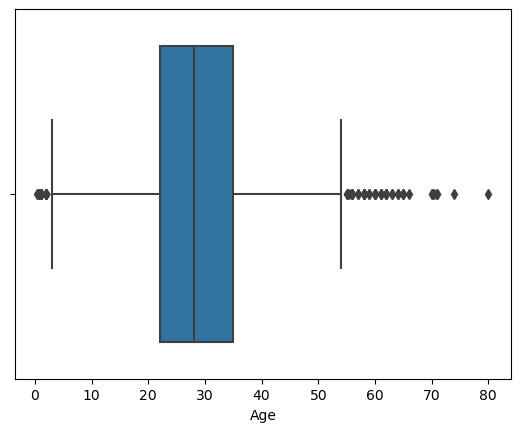

In [158]:
sns.boxplot(x=data1['Age'])

<Axes: xlabel='SibSp'>

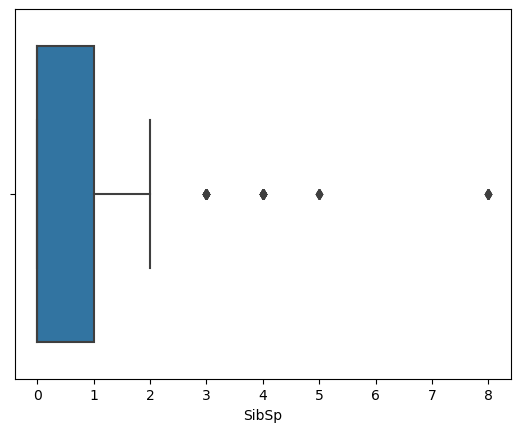

In [159]:
sns.boxplot(x=data1['SibSp'])

<Axes: xlabel='Fare'>

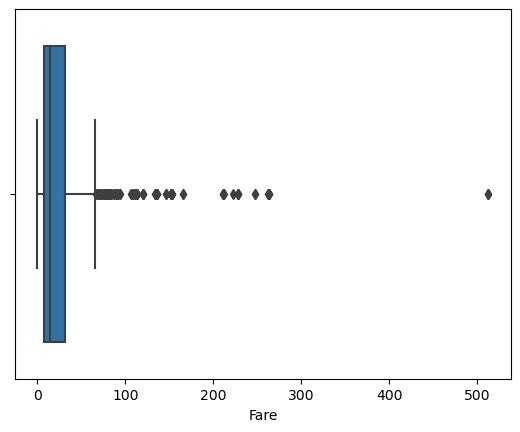

In [160]:
sns.boxplot(x=data1['Fare'])

In [161]:
# Using IQR method to handle the outliers

<Axes: xlabel='Age'>

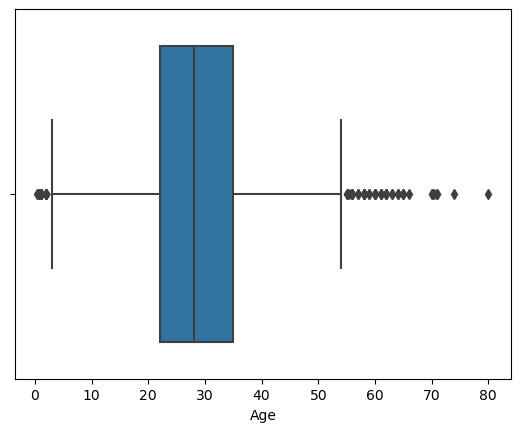

In [162]:
sns.boxplot(x=data1['Age'])

In [163]:
Q1 = data1['Age'].quantile(0.25)
Q3 = data1['Age'].quantile(0.75)

IQR = Q3-Q1
print(IQR)

13.0


In [164]:
up = Q3 + 1.5 * IQR
low = Q1 - 1.5 * IQR

print("Upper limit is ",up)
print("Lower limit is ",low)

Upper limit is  54.5
Lower limit is  2.5


In [165]:
def lim_imputer(value):
  if value>up:
    return up
  if value<low:
    return low
  else:
    return value

<Axes: xlabel='Age'>

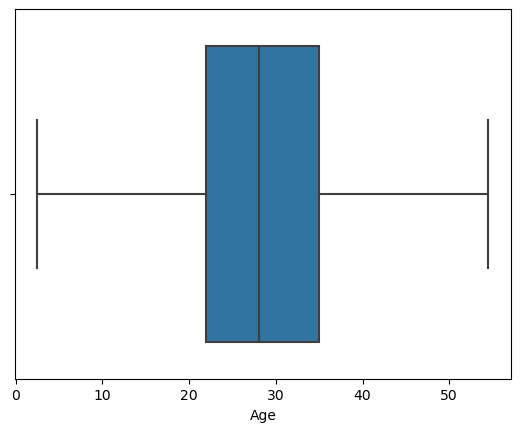

In [166]:
data1['Age'] = data1['Age'].apply(lim_imputer)
sns.boxplot(x=data1['Age'])

<Axes: xlabel='SibSp'>

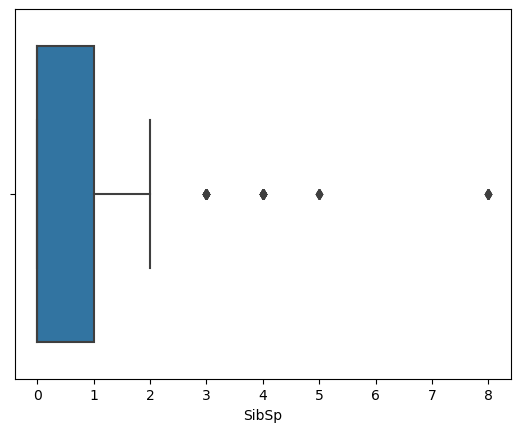

In [167]:
sns.boxplot(x=data1['SibSp'])

In [168]:
Q1 = data1['SibSp'].quantile(0.25)
Q3 = data1['SibSp'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

1.0


In [169]:
up = Q3 + 1.5 * IQR
low = Q1 - 1.5 * IQR
print("Upper limit is ",up)
print("Lower limit is ",low)

Upper limit is  2.5
Lower limit is  -1.5


In [170]:
def lim_imputer(value):
  if value>up:
    return up
  if value<low:
    return low
  else:
    return value

<Axes: xlabel='SibSp'>

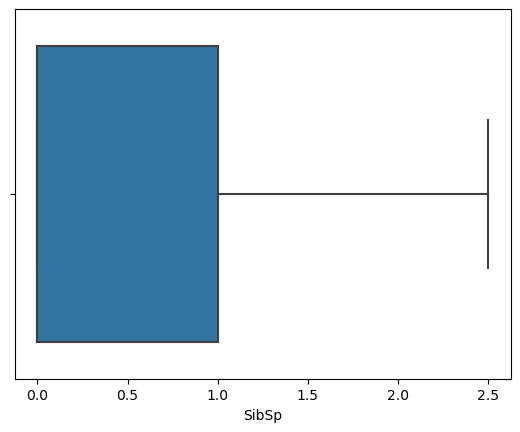

In [171]:
data1['SibSp'] = data1['SibSp'].apply(lim_imputer)
sns.boxplot(x=data1['SibSp'])

<Axes: xlabel='Fare'>

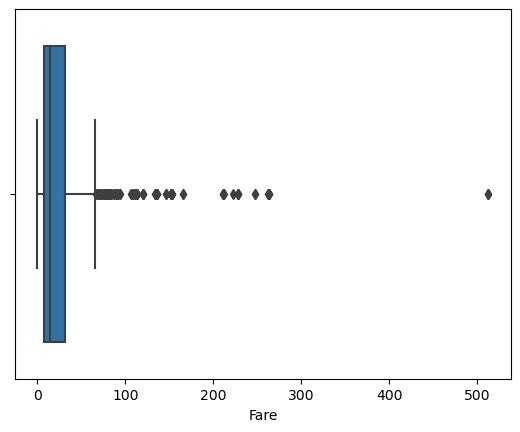

In [172]:
sns.boxplot(x=data1['Fare'])

In [173]:
Q1 = data1['Fare'].quantile(0.25)
Q3 = data1['Fare'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

23.0896


In [174]:
up = Q3 + 1.5 * IQR
low = Q1 - 1.5 * IQR
print("Upper limit is ",up)
print("Lower limit is ",low)

Upper limit is  65.6344
Lower limit is  -26.724


In [175]:
def lim_imputer(value):
  if value>up:
    return up
  if value<low:
    return low
  else:
    return value

<Axes: xlabel='Fare'>

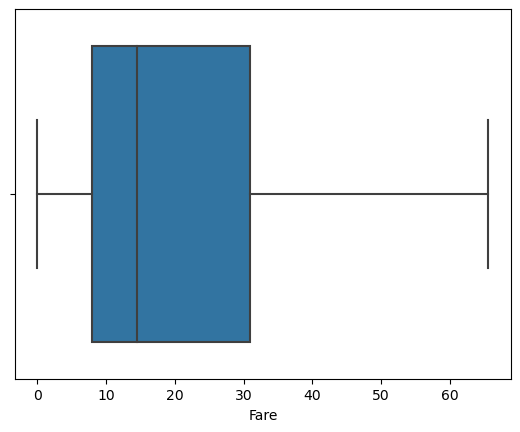

In [176]:
data1['Fare'] = data1['Fare'].apply(lim_imputer)
sns.boxplot(x=data1['Fare'])

In [177]:
# Encoding

In [178]:
data1.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp       float64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [179]:
# Column Sex and Embarked - convert to numerical values

In [180]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data1['Sex'] = label_encoder.fit_transform(data1['Sex'])
data1['Embarked'] = label_encoder.fit_transform(data1['Embarked'])
print("Dataset after encoding categorical variables:\n", data1.head(10))

Dataset after encoding categorical variables:
              Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                              
1                   0       3    1  22.0    1.0      0   7.2500         2
2                   1       1    0  38.0    1.0      0  65.6344         0
3                   1       3    0  26.0    0.0      0   7.9250         2
4                   1       1    0  35.0    1.0      0  53.1000         2
5                   0       3    1  35.0    0.0      0   8.0500         2
6                   0       3    1  28.0    0.0      0   8.4583         1
7                   0       1    1  54.0    0.0      0  51.8625         2
8                   0       3    1   2.5    2.5      1  21.0750         2
9                   1       3    0  27.0    0.0      2  11.1333         2
10                  1       2    0  14.0    1.0      0  30.0708         0


In [181]:
# Feature Scaling

In [182]:
from sklearn.preprocessing import StandardScaler
X = data1.drop(columns=['Survived'])
y = data1['Survived']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features after scaling:\n", X_scaled[:3])

Features after scaling:
 [[ 0.82737724  0.73769513 -0.58343208  0.81022003 -0.47367361 -0.82055245
   0.58595414]
 [-1.56610693 -1.35557354  0.74268522  0.81022003 -0.47367361  2.03162322
  -1.9423032 ]
 [ 0.82737724 -1.35557354 -0.25190275 -0.60251196 -0.47367361 -0.78757757
   0.58595414]]


In [183]:
# kNN and SVM model creation

In [184]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear')

In [185]:
print ("kNN model created")
print ("SVM model created")

kNN model created
SVM model created


In [186]:
# k-Fold Cross validation

In [187]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [188]:
# Evaluating both models with k-fold cross validation

In [189]:
knn_scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='accuracy')
print("kNN average accuracy with k-fold cross-validation: ", np.mean(knn_scores))

kNN average accuracy with k-fold cross-validation:  0.7990772707300231


In [190]:
svm_scores = cross_val_score(svm, X_scaled, y, cv=kf, scoring='accuracy')
print("SVM average accuracy with k-fold cross-validation: ", np.mean(svm_scores))

SVM average accuracy with k-fold cross-validation:  0.786761659657272


In [191]:
# Stratified k-Fold cross validation

In [192]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [193]:
# Evaluating both models with Stratified k-Fold cross validation

In [194]:
knn_stratified_scores = cross_val_score(knn, X_scaled, y, cv=skf, scoring='accuracy')
print("kNN average accuracy with stratified k-fold cross-validation: ", np.mean(knn_stratified_scores))

kNN average accuracy with stratified k-fold cross-validation:  0.8170422446801833


In [195]:
svm_stratified_scores = cross_val_score(svm, X_scaled, y, cv=skf, scoring='accuracy')
print("SVM average accuracy with stratified k-fold cross-validation: ", np.mean(svm_stratified_scores))

SVM average accuracy with stratified k-fold cross-validation:  0.7867553825874082


In [196]:
#end